@Author  : Ana Camila Mamede

@Email   : anacamilamamede@gmail.com

@File    : circuit_interactive_view_geomap.ipynb

@Software: Jupyter Notebook

# Circuit Interactive View - Geographic plots

This notebook demonstrates how to visualize the layout of a distribution feeder circuit using the `py_dss_toolkit` package. The example walks through compiling a DSS model, solving a power flow simulation, and generating a variety of interactive geographic plots, tailored with user-defined parameters.

## Step 1: Import Libraries

In this section, we import the necessary libraries.


In [1]:
# Import necessary libraries
import os
import pathlib
import py_dss_interface
from py_dss_toolkit import dss_tools

## Step 2: Define Script Path and DSS File Path

We define the path to the script and the DSS file used in the simulation.


In [2]:
# Define the script path and path to the DSS file
script_path = os.path.dirname(os.getcwd())
dss_file = os.path.join(script_path, "feeders", "1_3PAS_1", "Master__202312598_1_3PAS_1_------1-----.dss")

## Step 3: Create an Instance of DSS

We create an instance of the DSS class using `py_dss_interface` to initialize the simulation environment.


In [3]:
# Create an instance of DSS
dss = py_dss_interface.DSS()

## Step 4: Connect DSS Instance to `dss_tools`

We connect the DSS instance to `dss_tools` to enable the use of helper methods for visualization and analysis.


In [4]:
# Connect the DSS instance to the dss_tools
dss_tools.update_dss(dss)

## Step 5: Compile the DSS Model and Load Bus Coordinates

We compile the DSS model from the specified file and load the bus coordinates for visualization.

In [5]:
# Compile the DSS model from the specified file
dss.text(f"compile [{dss_file}]")

# Solve the power flow for the system
dss.text(f"solve")

''

## Step 6: Plot Active Power in the Circuit

We can plot the active power in the circuit using the default parameters and then customize the plot title and line width.


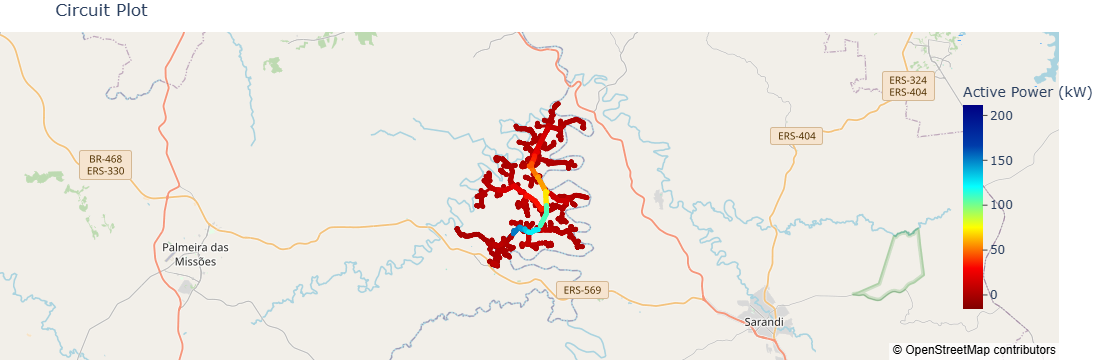

In [6]:
# Plot active power using default parameters
fig = dss_tools.interactive_view.circuit_geoplot(parameter="active power", show=False)
fig.show()

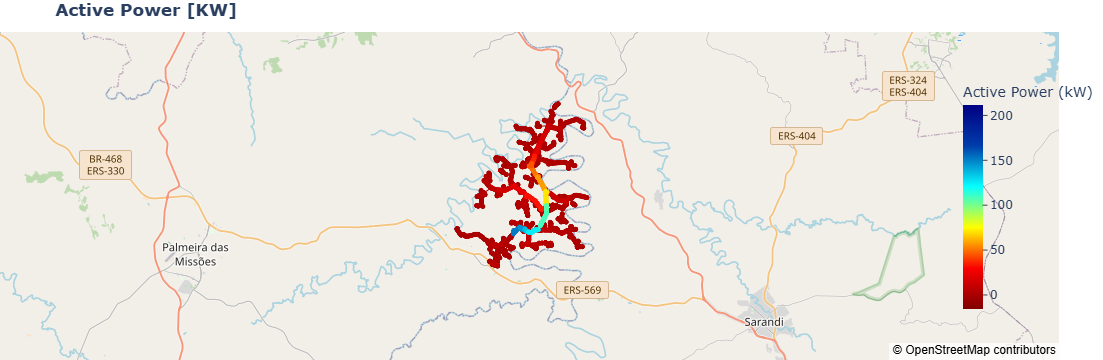

In [7]:
# Customize plot: Active power with title and custom line widths
fig = dss_tools.interactive_view.circuit_geoplot(parameter="active power", show=False, 
                                        title="<b>Active Power [KW]", 
                                        width_2ph=2, width_1ph=1)
fig.show()

## Step 7: Customize Map Styles and Highlight Specific Buses
We can enhance the circuit map by modifying the tile style and marking particular buses of interest. This improves visual clarity and emphasizes components for analysis or presentation. For additional map style options, refer to the Plotly tile map layers guide.

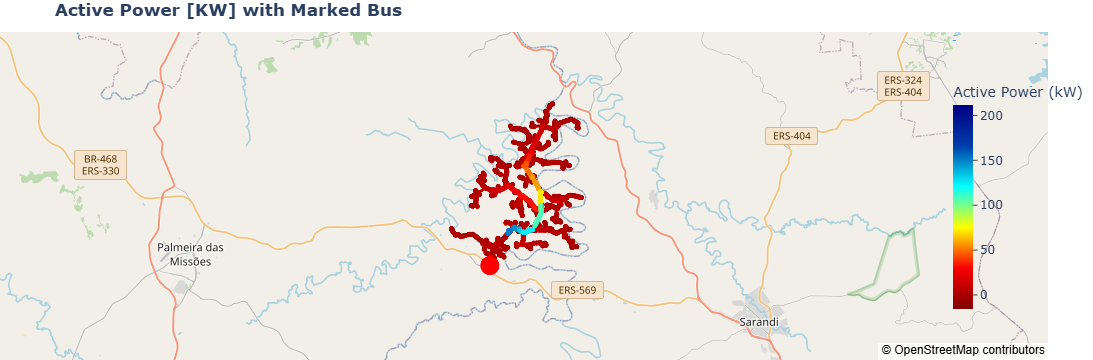

In [8]:
# Mark a specific bus in the circuit plot
bus_list = [dss_tools.interactive_view.circuit_get_bus_marker(name=dss.circuit.buses_names[0], marker_name="My Bus", 
                                                              color="red", size=20, symbol = 'circle')]
fig = dss_tools.interactive_view.circuit_geoplot(parameter="active power", show=False, 
                                                 title="<b>Active Power [KW] with Marked Bus", 
                                                 bus_markers=bus_list)
fig.show()

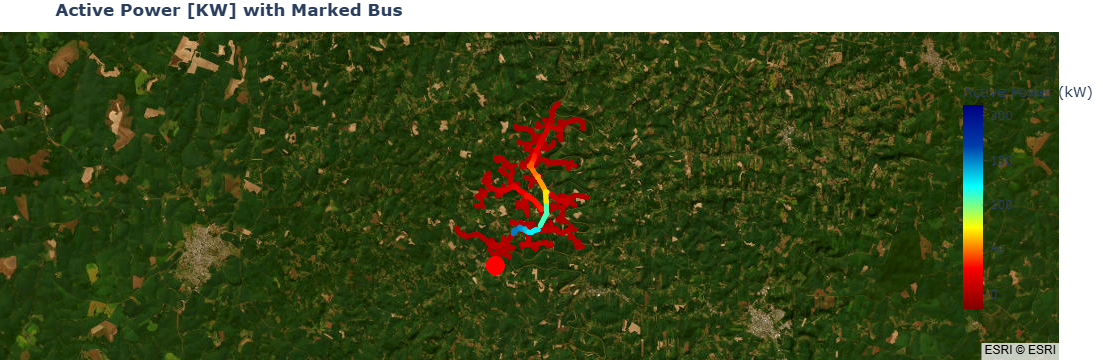

In [9]:
# Change base map and highlight specific buses
fig = dss_tools.interactive_view.circuit_geoplot(parameter="active power", show=False, 
                                                title="<b>Active Power [KW] with Marked Bus", 
                                                bus_markers=bus_list, 
                                                map_style="satellite")
fig.show()

## Step 8: Customize Power Settings and Voltage Plot

We can adjust the colorbar settings for the power plot and also visualize the circuit voltage profile.


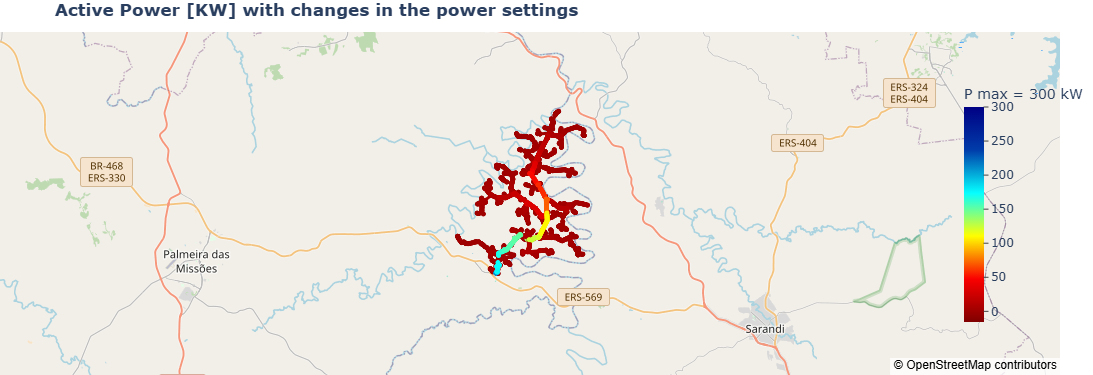

In [12]:
# Adjust power settings and plot active power with modified settings
dss_tools.interactive_view.active_power_settings.colorbar_cmax = 300
dss_tools.interactive_view.active_power_settings.colorbar_title = "P max = 300 kW"
fig = dss_tools.interactive_view.circuit_geoplot(parameter="active power", show=False,
                                                 title="<b>Active Power [KW] with changes in the power settings")
fig.show()

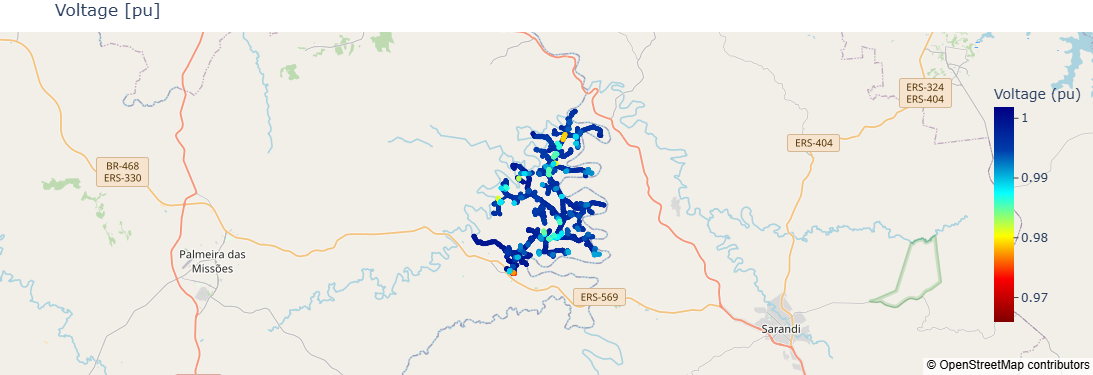

In [13]:
# Plot the voltage in the circuit
fig = dss_tools.interactive_view.circuit_geoplot(parameter="voltage", show=False, title="Voltage [pu]")
fig.show()

## Step 9: Plot Phases in the Circuit

We can visualize the phases in the circuit using a categorical plot, assigning specific colors to 3-phase, 2-phase, and 1-phase lines.


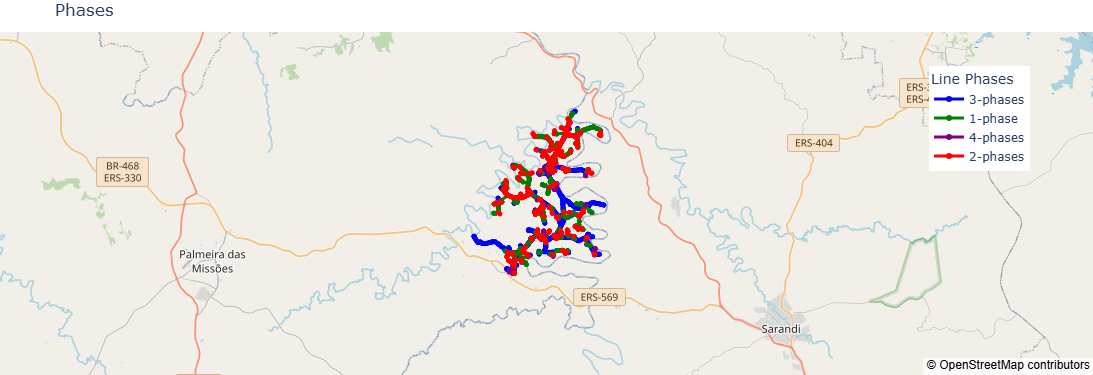

In [14]:
fig = dss_tools.interactive_view.circuit_geoplot(parameter="phases", title="Phases", show=False)
fig.show()

## Step 10: User-Defined Numerical and Categorical Plots

We can create user-defined numerical and categorical circuit plots by specifying custom results and settings.


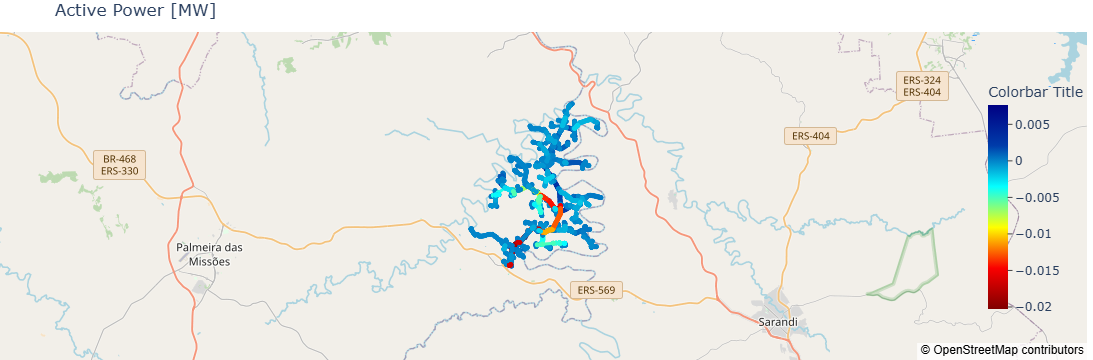

In [15]:
# User-defined numerical plot: Active power in MW
dss_tools.interactive_view.user_numerical_defined_settings.results = dss_tools.results.powers_elements[0].iloc[:, :3].sum(axis=1) / 1000
dss_tools.interactive_view.user_numerical_defined_settings.unit = "MW"
fig = dss_tools.interactive_view.circuit_geoplot(parameter="user numerical defined", title="Active Power [MW]", show=False)
fig.show()

## Conclusion

In this notebook, we demonstrated how to visualize the circuit of a distribution feeder using the `py_dss_toolkit` package. We covered compiling the DSS model, solving a power flow simulation, and generating various interactive circuit plots. The flexibility provided by `dss_tools` allows for detailed and customized visualizations of distribution systems, making it easy to analyze different electrical parameters such as active power and voltage, as well as user-defined numerical and categorical data.